In [32]:
# printing the data from csv file
import pandas as pd

df = pd.read_csv('CarPrice_Assignment.csv')
display(df.head())
print(df.shape)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


(205, 26)


In [33]:
# Checking null count and percentage
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100


# Removing columns with high null percentage (>50%)
columns_drop = null_percentages[null_percentages > 50].index
df = df.drop(columns=columns_drop)

# Removing rows with high null values (>50%)
rows_drop = df.isnull().sum(axis=1) / len(df.columns) > 0.5
df = df.loc[~rows_drop]

# Droping unwanted columns
unwanted_columns = ['car_ID']  
df = df.drop(columns=unwanted_columns)

display(df.head())
print(df.shape)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


(205, 25)


In [34]:
# Spliting CarName into carCompany
df['carCompany'] = df['CarName'].str.split(' ').str[0]

# Correcting spelling errors in carCompany
df['carCompany'] = df['carCompany'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche',
                                            'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

# Droping car_ID and CarName columns
df = df.drop(columns=['CarName'])

display(df.head())

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [35]:
# Identifying categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Creating dummy variables for categorical columns with more than 2 unique values
for col in categorical_columns:
    if len(df[col].unique()) > 2:
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(col, axis=1)

display(df.head())

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,carCompany_nissan,carCompany_peugeot,carCompany_plymouth,carCompany_porsche,carCompany_renault,carCompany_saab,carCompany_subaru,carCompany_toyota,carCompany_volkswagen,carCompany_volvo
0,3,gas,std,two,front,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,False,False,False
1,3,gas,std,two,front,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,False,False,False
2,1,gas,std,two,front,94.5,171.2,65.5,52.4,2823,...,False,False,False,False,False,False,False,False,False,False
3,2,gas,std,four,front,99.8,176.6,66.2,54.3,2337,...,False,False,False,False,False,False,False,False,False,False
4,2,gas,std,four,front,99.4,176.6,66.4,54.3,2824,...,False,False,False,False,False,False,False,False,False,False


In [36]:
# Creating car_stability column
df['car_stability'] = df['wheelbase'] / df['carlength']

# Droping highly correlated columns
columns_to_drop = ['carlength', 'carwidth', 'curbweight', 'highwaympg', 'car_stability']
df = df.drop(columns=columns_to_drop, errors='ignore')

display(df.head())

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,enginesize,boreratio,stroke,...,carCompany_nissan,carCompany_peugeot,carCompany_plymouth,carCompany_porsche,carCompany_renault,carCompany_saab,carCompany_subaru,carCompany_toyota,carCompany_volkswagen,carCompany_volvo
0,3,gas,std,two,front,88.6,48.8,130,3.47,2.68,...,False,False,False,False,False,False,False,False,False,False
1,3,gas,std,two,front,88.6,48.8,130,3.47,2.68,...,False,False,False,False,False,False,False,False,False,False
2,1,gas,std,two,front,94.5,52.4,152,2.68,3.47,...,False,False,False,False,False,False,False,False,False,False
3,2,gas,std,four,front,99.8,54.3,109,3.19,3.40,...,False,False,False,False,False,False,False,False,False,False
4,2,gas,std,four,front,99.4,54.3,136,3.19,3.40,...,False,False,False,False,False,False,False,False,False,False


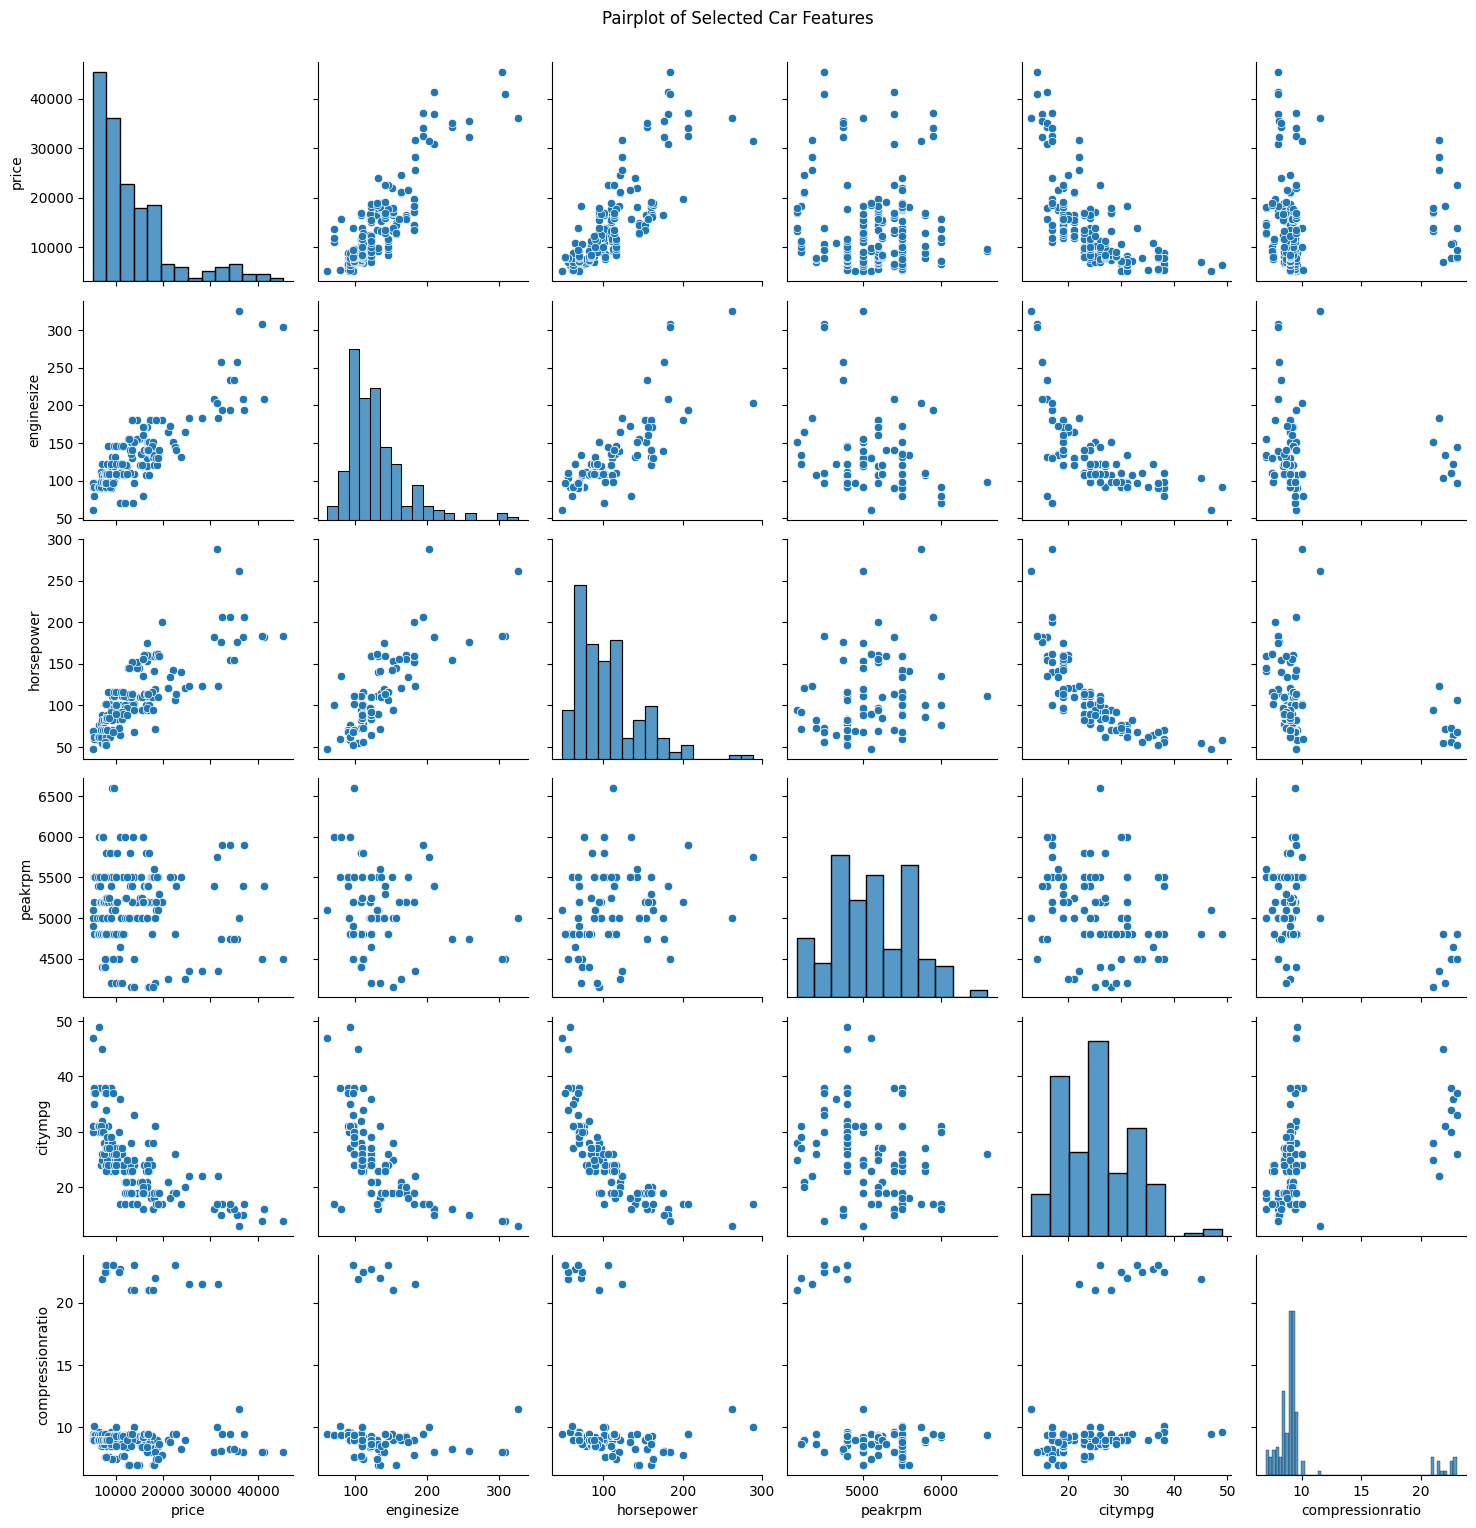

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# numerical features for pairplot
selected_columns = ['price', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'compressionratio']
sns.pairplot(df[selected_columns])
plt.suptitle('Pairplot of Selected Car Features', y=1.02)
plt.show()


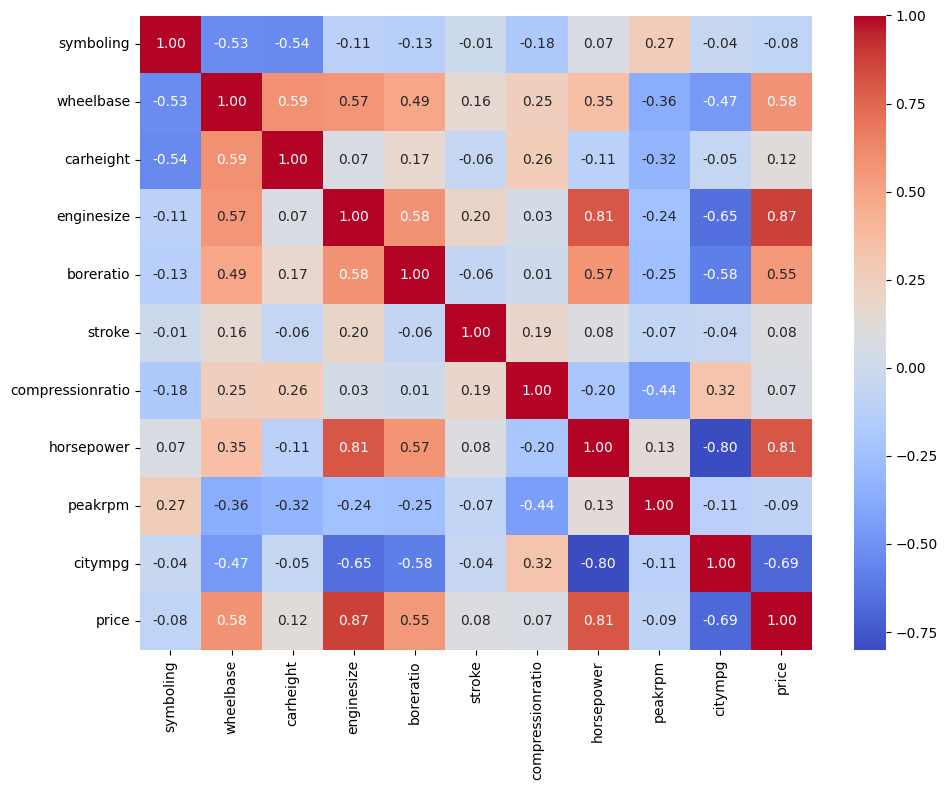

In [38]:
# Creating the heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = quant_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.show()

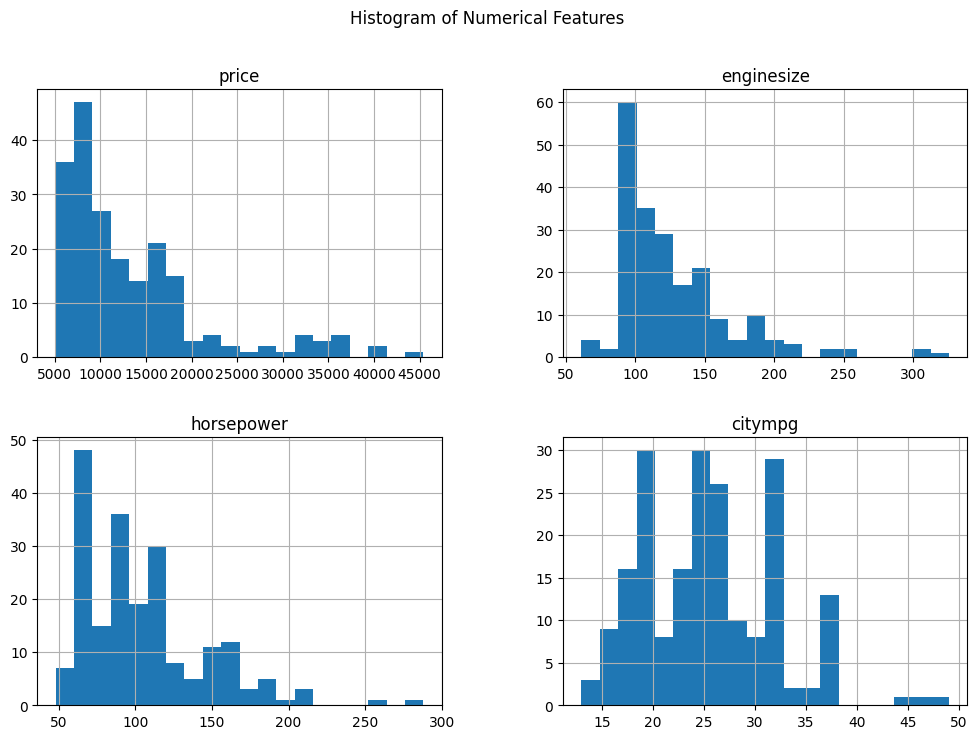

In [39]:
df[['price', 'enginesize', 'horsepower', 'citympg']].hist(figsize=(12, 8), bins=20)
plt.suptitle('Histogram of Numerical Features')
plt.show()


# Final Report

# 1.Data Cleaning

* Removed columns and rows that had too many missing values.
* Dropped unnecessary columns like car_ID and CarName which weren’t useful for analysis.
* Cleaned up the car brand names (e.g., fixed spelling mistakes like "maxda" to "mazda").

#  2. Data Preparation

* Split the CarName into a new column carCompany for better insights.
* Converted fuel type, car body , etc into numbers using dummy variables.
* Created a new feature car_stability = wheelbase / carlength, but removed it later because it was too similar to other features.

# 3. Visualization & Insights

# Heatmap
* Showed how strongly different features are related.
    * Bigger engines and more horsepower → higher prices.
    * Better fuel economy (more mpg) → lower prices.

# Pairplot
* Helped see how each feature interacts with others and the target (price).
    * Engine size, horsepower, and curb weight are good predictors of price.
    * Some features don’t change much with price, so they are less useful.

# Histograms
* Most car prices are below $20,000, but a few luxury cars go much higher.
* Engine sizes and horsepower also mostly stay within a certain range, with a few outliers.

# Final Takeaways
* Engine size, horsepower, and brand are the biggest factors influencing car price.
* Cars with better mileage are generally cheaper.